In [27]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
from textblob import TextBlob

# Function to analyze sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Example reviews scraping and sentiment analysis part
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10  # Number of pages you want to scrape
page_size = 100  # Number of reviews per page

reviews = []  # List to store the reviews

# Scraping reviews
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url, verify=False)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")

# Creating DataFrame
df = pd.DataFrame()
df["reviews"] = reviews

# Analyzing sentiment
df['sentiment'] = df['reviews'].apply(get_sentiment)

# Counting sentiment occurrences and ensuring they are integers
sentiment_counts = df['sentiment'].value_counts().to_dict()
sentiment_counts = {k: int(v) for k, v in sentiment_counts.items()}  # Ensure counts are integers

# Handling missing sentiment categories
sentiment_counts.setdefault('positive', 0)
sentiment_counts.setdefault('negative', 0)
sentiment_counts.setdefault('neutral', 0)

# Total reviews count
total_reviews = len(df)

# Calculating percentages
positive_percentage = (sentiment_counts.get('positive', 0) / total_reviews) * 100
negative_percentage = (sentiment_counts.get('negative', 0) / total_reviews) * 100
neutral_percentage = (sentiment_counts.get('neutral', 0) / total_reviews) * 100

# Displaying results
print(f"Positive reviews: {sentiment_counts.get('positive', 0)} ({positive_percentage:.2f}%)")
print(f"Negative reviews: {sentiment_counts.get('negative', 0)} ({negative_percentage:.2f}%)")
print(f"Neutral reviews: {sentiment_counts.get('neutral', 0)} ({neutral_percentage:.2f}%)")

# You can also save these results to a CSV file if needed
output_dir = "C:/Users/99906068/OneDrive - L&T Construction/Desktop/British Airways"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


Scraping page 1


c:\Users\99906068\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.airlinequality.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


   ---> 100 total reviews
Scraping page 2


c:\Users\99906068\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.airlinequality.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


   ---> 200 total reviews
Scraping page 3


c:\Users\99906068\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.airlinequality.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


   ---> 300 total reviews
Scraping page 4


c:\Users\99906068\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.airlinequality.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


   ---> 400 total reviews
Scraping page 5


c:\Users\99906068\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.airlinequality.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


   ---> 500 total reviews
Scraping page 6


c:\Users\99906068\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.airlinequality.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


   ---> 600 total reviews
Scraping page 7


c:\Users\99906068\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.airlinequality.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


   ---> 700 total reviews
Scraping page 8


c:\Users\99906068\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.airlinequality.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


   ---> 800 total reviews
Scraping page 9


c:\Users\99906068\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.airlinequality.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


   ---> 900 total reviews
Scraping page 10


c:\Users\99906068\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.airlinequality.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


   ---> 1000 total reviews
Positive reviews: 621 (62.10%)
Negative reviews: 369 (36.90%)
Neutral reviews: 10 (1.00%)


In [16]:
import re #re: For regular expression operations to clean text.

In [20]:
print(df.head())

                                             reviews sentiment
0  ✅ Trip Verified |  While BA may have made some...  negative
1  ✅ Trip Verified | British Airways new Club Sui...  positive
2  ✅ Trip Verified |  Four very pleasant, on time...  positive
3  Not Verified |   We travel extensively over 25...  positive
4  ✅ Trip Verified |  Flight delayed an hour due ...  negative


In [21]:
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['reviews', 'sentiment'], dtype='object')


In [22]:
print(df.reviews)

0      ✅ Trip Verified |  While BA may have made some...
1      ✅ Trip Verified | British Airways new Club Sui...
2      ✅ Trip Verified |  Four very pleasant, on time...
3      Not Verified |   We travel extensively over 25...
4      ✅ Trip Verified |  Flight delayed an hour due ...
                             ...                        
995    ✅ Trip Verified |  Lima to Gatwick. Helpful an...
996    ✅ Trip Verified | Inverness to Auckland via Si...
997    ✅ Trip Verified | I was seated right next to t...
998    ✅ Trip Verified |  Flight was OK, minor delay ...
999    ✅ Trip Verified |  \r\nGatwick to Barbados ret...
Name: reviews, Length: 1000, dtype: object


In [23]:
def clean_reviews(reviews):# Function to clean a single review
    reviews = re.sub(r'✅ Trip Verified ','', reviews)  # Remove "✅ Trip Verified" and any other unnecessary text
    return reviews

In [24]:
if 'reviews' in df.columns:
    # Apply the cleaning function to the reviews column
    df['reviews'] = df['reviews'].apply(clean_reviews)
    print(df.head())

                                             reviews sentiment
0  |  While BA may have made some positive improv...  negative
1  | British Airways new Club Suite is a marked i...  positive
2  |  Four very pleasant, on time flights with fr...  positive
3  Not Verified |   We travel extensively over 25...  positive
4  |  Flight delayed an hour due to bad weather a...  negative


In [25]:
output_file = 'Final_BA_reviews.csv'
print(f"Cleaned data saved {output_file}")

Cleaned data saved Final_BA_reviews.csv


In [26]:
df.to_csv('C:/Users/99906068/OneDrive - L&T Construction/Desktop/British Airways/Final_BA_reviews.csv', index=False)

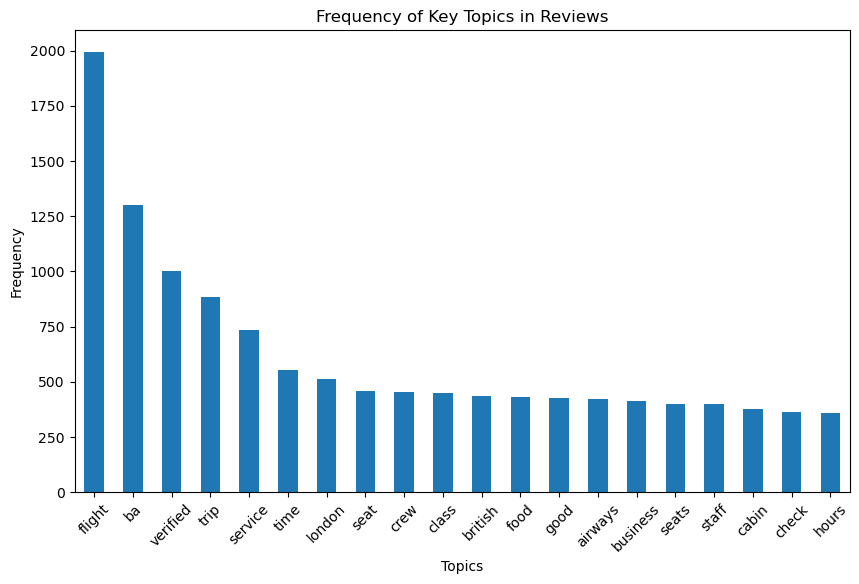

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the reviews

# Step 1: Extract Key Topics
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['reviews'])

# Convert the result to a DataFrame
words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Step 2: Count Frequencies
word_counts = words_df.sum(axis=0)

# Step 3: Generate a Frequency Chart
plt.figure(figsize=(10, 6))
word_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Frequency of Key Topics in Reviews')
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

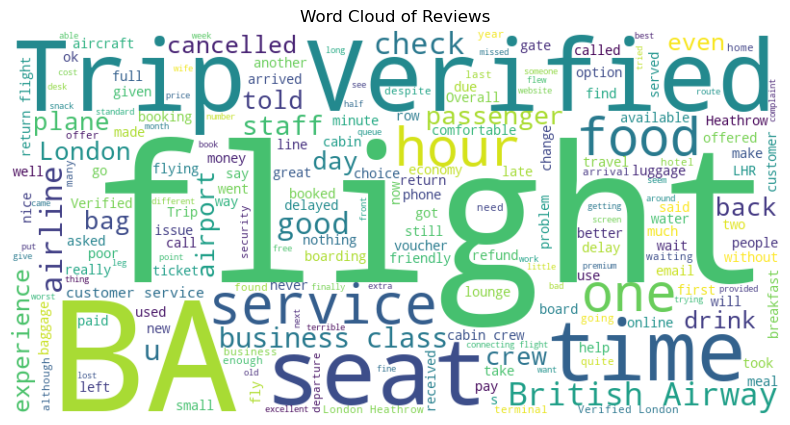

In [10]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = " ".join(review for review in df['reviews'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [12]:
import matplotlib.pyplot as plt

In [15]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.backends.backend_pdf import PdfPages



print(f"Visualization results saved successfully to {output_file}")

# Save DataFrame with sentiments
output_dir = "C:/Users/99906068/OneDrive - L&T Construction/Desktop/British Airways"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
df.to_csv(os.path.join(output_dir, "BA_reviews_with_sentiments.csv"), index=False)


Visualization results saved successfully to visualization_results.pdf
